In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
from timeit import default_timer as timer
np.random.seed(1000)

**Question 3 Part 1,2,3,4 and 5**

1. Follow the link and solve it.

2. Follow the link and solve it.

3. With a starting point x0 =

0 0 . . . 0
⊤
∈ R10, solve problem (1) using Newton’s method implemented with
backtracking line search (use α0 = 0.99, ρ = 0.5, γ = 0.5 for backtracking line search, and τ = 10−4). Comment
on difficulties (if any) you face when computing the inverse of Hessian (recall that you need to use an appropriate
Python function to compute the inverse of the Hessian). If you face difficulty in computing inverse of Hessian,
try to think of some remedy so that you can avoid the issue.
• Let x∗ be the final optimal solution provided by your algorithm. Report the values of x∗ and ¯x, and discuss
the observations.
• Plot the values log(∥xk − x∗∥2) against iterations k = 0, 1, 2, . . ..

Prepare a different plot for plotting log(|f(xk) − f(x∗)|) obtained from Newton’s method against the iterations.
• Comment on the convergence rates of the iterates and the objective function values.

4. With a starting point x0 =

0 0 . . . 0
⊤
∈ R10, solve problem (1) using BFGS method implemented with
backtracking line search (use α0 = 0.99, ρ = 0.5, γ = 0.5 for backtracking line search, and τ = 10−4).
• Let x∗ be the final optimal solution provided by BFGS algorithm. Report the values of x∗ and ¯x, and discuss
the observations.
• Plot the values log(∥xk − x∗∥2) against iterations k = 0, 1, 2, . . ..
• Prepare a different plot for plotting log(|f(xk)−f(x∗)|) obtained from BFGS method against the iterations.
• Comment on the convergence rates of the iterates and the objective function values.
5. Compare and contrast the results obtained by Newton’s method and BFGS method and comment on the time
taken by both the methods.

In [ ]:
def create_data():
    np.random.seed(1000)

    A = np.random.randn(1000, 10)
    x_bar = np.zeros(10)
    for i in range(10):
      if (i+1)%2 == 0:
        x_bar[i] = np.random.uniform(low = i+1, high = i+2)
      else:
        x_bar[i] = np.random.uniform(low = -(i+2), high = -(i+1) )
      x_bar = np.array(x_bar)
      x_bar = x_bar.reshape(10,1)
    epsilon = np.random.randn(1000, 1)
    y = np.add(np.dot(A, x_bar), epsilon)

    return A, x_bar, y

In [ ]:
#Now we will define a function which will compute and return the function value
def evalf(A, x, y):
    #Input: x is a numpy array of size 2
    assert type(x) is np.ndarray
    assert x.shape[0] == 10 and x.shape[1] == 1
    assert type(y) is np.ndarray and len(y) == 1000

    temp = np.subtract(np.dot(A,x),y)
    fval = 0.5*np.linalg.norm(temp,2)**2
    return fval


In [ ]:
A,_,y = create_data()
x = []
for i in range(10):
  x.append([1])
x = np.array(x)

In [ ]:
#Now we will define a function which will compute and return the gradient value as a numpy array
def evalg(A, x, y):
    #Input: x is a numpy array of size 2
    assert type(x) is np.ndarray and x.shape[0] == 10 and x.shape[1] == 1
    assert type(y) is np.ndarray and len(y) == 1000

    temp = np.dot(A,x) - y
    grad = np.dot(A.T,temp)
    return grad

In [ ]:
def evalh(A, x):
    assert type(x) is np.ndarray and x.shape[0] == 10 and x.shape[1] == 1
    hess = np.matmul(A.T, A)

    return hess

In [ ]:
def compute_D_k_newton(A, x):
    assert type(x) is np.ndarray and x.shape[0] == 10 and x.shape[1] == 1
    d = np.linalg.inv(evalh(A, x))
    return d
def compute_steplength_backtracking_scaled_direction(A, x, y, gradf, D_k, alpha_start, rho, gamma): #add appropriate arguments to the function
    assert type(x) is np.ndarray and x.shape[0] == 10 and x.shape[1] == 1
    assert type(y) is np.ndarray and len(y) == 1000
    assert type(gradf) is np.ndarray and len(gradf) == 10
    assert type(alpha_start) is float and alpha_start>=0.
    assert type(rho) is float and rho>=0.
    assert type(gamma) is float and gamma>=0.
    assert type(D_k) is np.ndarray and len(D_k) == 10

    alpha = alpha_start
    p_k = -np.dot(D_k,gradf)
    # while evalf(A, np.add(x, alpha*np.dot(D_k,p)), y) > np.subtract(evalf(A, x, y), gamma*alpha*np.dot(np.dot(D_k,gradf), gradf)):
    while evalf(A, np.add(x,np.multiply(alpha,p_k)),y) > np.multiply(gamma*alpha,np.dot(gradf.T,p_k)) + evalf(A,x,y):
        alpha = rho*alpha

    return alpha

In [ ]:
#line search type
CONSTANT_STEP_LENGTH = 3
BACKTRACKING_LINE_SEARCH = 2
EXACT_LINE_SEARCH = 1

In [ ]:
#Method to find the minimizer using Newton's method
def find_minimizer_Newtonmethod(start_x, A, y, tol, line_search_type, *args):
    #Input: start_x is a numpy array of size n, tol denotes the tolerance and is a positive float value
    assert type(start_x) is np.ndarray #do not allow arbitrary type arguments
    assert start_x.shape[0] == 10 and start_x.shape[1] == 1
    assert type(tol) is float and tol>=0

    x = start_x
    g_x = evalg(A, x, y)

    x_array = [x]
    f_array = [evalf(A, x,y)]
    if line_search_type == BACKTRACKING_LINE_SEARCH:
        if args is None:
            err_msg = 'Line search type: BACKTRACKING_LINE_SEARCH, but did not receive any args. Please check!'
            raise ValueError(err_msg)
        elif len(args)<3 :
            err_msg = 'Line search type: BACKTRACKING_LINE_SEARCH, but did not receive three args. Please check!'
            raise ValueError(err_msg)
        else:
            alpha_start = float(args[0])
            rho = float(args[1])
            gamma = float(args[2])
    k = 0

    # print('iter:',k,  ' f(x):', evalf(x,n), ' gradient norm:', np.linalg.norm(g_x))

    while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
        d_k = compute_D_k_newton(A, x)
        if line_search_type == BACKTRACKING_LINE_SEARCH:
            step_length = compute_steplength_backtracking_scaled_direction(A, x, y, g_x, d_k, alpha_start, rho, gamma)
        elif line_search_type == CONSTANT_STEP_LENGTH:
            step_length = 1.0
        else:
            raise ValueError('Line search type unknown. Please check!')

        # Gradient descent steps
        x = np.subtract(x, np.multiply(step_length,np.dot(d_k, g_x)))
        k += 1
        g_x = evalg(A, x, y)
        x_array.append(x)
        f_array.append(evalf(A, x,y))
        # print('iter:',k, ' x:', x, ' f(x):', evalf(A, x, y), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

    return x_array, f_array, k

In [ ]:
#Method to find minimizer using BFGS method
def find_minimizer_BFGS(start_x, A, y, tol, line_search_type, *args):
    assert type(start_x) is np.ndarray
    assert start_x.shape[0] == 10 and start_x.shape[1] == 1
    assert type(tol) is float and tol>=0

    x = start_x
    g_x = evalg(A, x, y)

    if line_search_type == BACKTRACKING_LINE_SEARCH:
        if args is None:
            err_msg = 'Line search type: BACKTRACKING_LINE_SEARCH, but did not receive any args. Please check!'
            raise ValueError(err_msg)
        elif len(args)<3 :
            err_msg = 'Line search type: BACKTRACKING_LINE_SEARCH, but did not receive three args. Please check!'
            raise ValueError(err_msg)
        else:
            alpha_start = float(args[0])
            rho = float(args[1])
            gamma = float(args[2])
    k = 0
    B = np.identity(10)
    x_array = [x]
    f_array = [evalf(A, x,y)]

    while (np.linalg.norm(g_x) > tol):
        p = -np.dot(B, g_x)
        if line_search_type == BACKTRACKING_LINE_SEARCH:
            d_k = B
            step_length = compute_steplength_backtracking_scaled_direction(A, x, y, g_x, d_k, alpha_start, rho, gamma)
        elif line_search_type == CONSTANT_STEP_LENGTH:
            step_length = 1.0
        else:
            raise ValueError('Line search type unknown. Please check!')

        # Gradient descent steps
        x_next = np.add(x, np.multiply(step_length,p))
        s_k = x_next - x
        y_k = evalg(A, x_next,y) - g_x
        mu_k = 1.0/np.dot(y_k.T, s_k)
        temp = (np.identity(10) - np.multiply(mu_k,np.outer(y_k, s_k.T)))
        B = np.dot(temp.T, np.dot(B, temp)) + np.multiply(mu_k, np.outer(s_k, s_k.T))
        k += 1
        x = x_next
        g_x = evalg(A, x, y)

        x_array.append(x)
        f_array.append(evalf(A, x, y))
        # print('iter:',k, ' x:', x, ' f(x):', evalf(A, x, y), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))


    return x_array, f_array, k

In [ ]:
A, x_bar, y = create_data()
my_start_x = []
for i in range(10):
  my_start_x.append([0])
my_start_x=np.array(my_start_x)


Results obtained from Newton method (with backtracking)
Minimizer: [[-1.04982253]
 [ 2.95189743]
 [-3.34298192]
 [ 4.60956007]
 [-5.71176195]
 [ 6.89877618]
 [-7.62879358]
 [ 8.16821112]
 [-9.22221199]
 [10.05669293]],
Final Objective function value: 505.647329524551,
Iterations taken to terminate: 5


Actual x_bar: [[-1.06258705]
 [ 2.94307072]
 [-3.34150552]
 [ 4.58252615]
 [-5.75947573]
 [ 6.93512469]
 [-7.61893094]
 [ 8.16818187]
 [-9.2179964 ]
 [10.00022174]]

Time taken to find minimizer by Newton's method: 0.0026267569999731677



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log


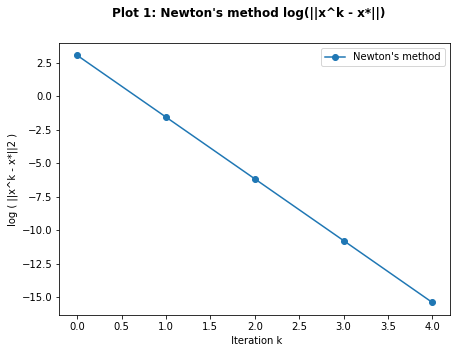

In [ ]:
#Trying out for a small case of Newton's method with backtracking search
my_tol= 1e-5
alpha_start = 0.99
rho = 0.5
gamma = 0.5
start_time = timer()
x_array_newton, f_array_newton, iters_opt_newton = find_minimizer_Newtonmethod(my_start_x, A, y, my_tol, BACKTRACKING_LINE_SEARCH, alpha_start, rho, gamma)
end_time = timer()
times_newton = end_time - start_time
print(f"\nResults obtained from Newton method (with backtracking)\nMinimizer: {x_array_newton[-1]},\nFinal Objective function value: {f_array_newton[-1]},\nIterations taken to terminate: {iters_opt_newton}\n")
print('')
print(f'Actual x_bar: {x_bar}\n')
print(f"Time taken to find minimizer by Newton's method: {times_newton}")
print('')


x_opt = x_array_newton[-1]
plot_x = []
for i in range(len(x_array_newton)):
    plot_x.append(np.log(np.linalg.norm(x_array_newton[i] - x_opt)))

fig, ax = plt.subplots(1,1, figsize = (7,5))
fig.suptitle("Plot 1: Newton's method log(||x^k - x*||)", fontweight= 'bold')
ax.plot(np.arange(len(x_array_newton)), plot_x, 'o-', label = "Newton's method")
ax.set_xlabel(" Iteration k")
ax.set_ylabel("log ( ||x^k - x*||2 )")
ax.legend()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


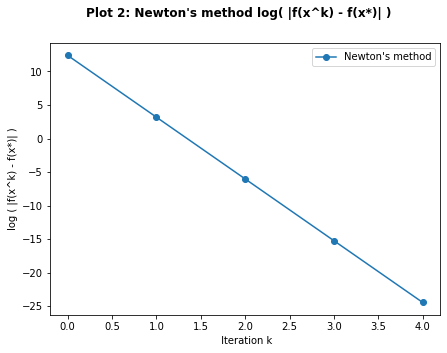

In [ ]:
f_opt = f_array_newton[-1]
plot_fx = []
for i in range(len(f_array_newton)):
    plot_fx.append(np.log(np.abs(f_array_newton[i] - f_opt)))

fig2, ax = plt.subplots(1,1, figsize = (7,5))
fig2.suptitle("Plot 2: Newton's method log( |f(x^k) - f(x*)| )", fontweight= 'bold')
ax.plot(np.arange(len(f_array_newton)), plot_fx, 'o-', label = "Newton's method")
ax.set_xlabel(" Iteration k")
ax.set_ylabel("log ( |f(x^k) - f(x*)| )")
ax.legend()

Newton's Method with backtracking line search

α=0.99,ρ=0.5,γ=0.5

Let x∗ be the final optimal solution provided by our algorithm.

The values of x∗=[[-1.04982253]
 [ 2.95189743]
 [-3.34298192]
 [ 4.60956007]
 [-5.71176195]
 [ 6.89877618]
 [-7.62879358]
 [ 8.16821112]
 [-9.22221199]
 [10.05669293]],

x¯=[[-1.06258705]
 [ 2.94307072]
 [-3.34150552]
 [ 4.58252615]
 [-5.75947573]
 [ 6.93512469]
 [-7.61893094]
 [ 8.16818187]
 [-9.2179964 ]
 [10.00022174]]

f(x∗)=505.647329524551

f(x¯)=505.647329524551

Both values x∗ and x¯ are almost same with tolerance precision.

Both values f(x∗) and f(x¯) are almost same with tolerance precision.

The convergence rate is same and Q-quadratic for both the iterates and the objective function values. Initially It is converging so quickly and after some time it starts converging somewhat slowly.


Results obtained from BFGS method (with backtracking)
Minimizer: [[-1.04982253]
 [ 2.95189743]
 [-3.34298192]
 [ 4.60956007]
 [-5.71176195]
 [ 6.89877618]
 [-7.62879358]
 [ 8.16821111]
 [-9.22221199]
 [10.05669293]],
Final Objective function value: 505.64732952455125,
Iterations taken to terminate: 18


Actual x_bar: [[-1.06258705]
 [ 2.94307072]
 [-3.34150552]
 [ 4.58252615]
 [-5.75947573]
 [ 6.93512469]
 [-7.61893094]
 [ 8.16818187]
 [-9.2179964 ]
 [10.00022174]]

Time taken to find minimizer by BFGS method: 0.025049784999964686



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log


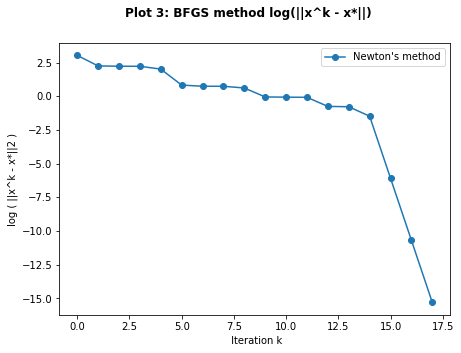

In [ ]:
my_start_x = []
for i in range(10):
  my_start_x.append([0])
my_start_x=np.array(my_start_x)
my_tol= 1e-5
alpha_start = 0.99
rho = 0.5
gamma = 0.5
start_time = timer()
x_array_bfgs, f_array_bfgs, iters_opt_bfgs = find_minimizer_BFGS(my_start_x, A, y, my_tol, BACKTRACKING_LINE_SEARCH, alpha_start, rho, gamma)
end_time = timer()
time_bfgs = end_time - start_time
print(f"\nResults obtained from BFGS method (with backtracking)\nMinimizer: {x_array_bfgs[-1]},\nFinal Objective function value: {f_array_bfgs[-1]},\nIterations taken to terminate: {iters_opt_bfgs}\n")
print('')
print(f'Actual x_bar: {x_bar}\n')
print(f"Time taken to find minimizer by BFGS method: {time_bfgs}")
print('')

x_opt = x_array_bfgs[-1]
plot_x_bfgs = []
for i in range(len(x_array_bfgs)):
    plot_x_bfgs.append(np.log(np.linalg.norm(x_array_bfgs[i] - x_opt)))

fig, ax = plt.subplots(1,1, figsize = (7,5))
fig.suptitle("Plot 3: BFGS method log(||x^k - x*||)", fontweight= 'bold')
ax.plot(np.arange(len(x_array_bfgs)), plot_x_bfgs, 'o-', label = "Newton's method")
ax.set_xlabel(" Iteration k")
ax.set_ylabel("log ( ||x^k - x*||2 )")
ax.legend()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


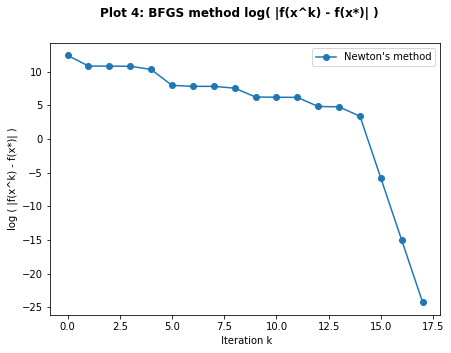

In [ ]:
f_opt_bfgs = f_array_bfgs[-1]
plot_fx_bfgs = []
for i in range(len(f_array_bfgs)):
    plot_fx_bfgs.append(np.log(np.abs(f_array_bfgs[i] - f_opt_bfgs)))

fig2, ax = plt.subplots(1,1, figsize = (7,5))
fig2.suptitle("Plot 4: BFGS method log( |f(x^k) - f(x*)| )", fontweight= 'bold')
ax.plot(np.arange(len(f_array_bfgs)), plot_fx_bfgs, 'o-', label = "Newton's method")
ax.set_xlabel(" Iteration k")
ax.set_ylabel("log ( |f(x^k) - f(x*)| )")
ax.legend()

Let x∗ be the final optimal solution provided by our algorithm.

The values of x∗=[[-1.04982253]
 [ 2.95189743]
 [-3.34298192]
 [ 4.60956007]
 [-5.71176195]
 [ 6.89877618]
 [-7.62879358]
 [ 8.16821111]
 [-9.22221199]
 [10.05669293]]

x¯=[[-1.06258705]
 [ 2.94307072]
 [-3.34150552]
 [ 4.58252615]
 [-5.75947573]
 [ 6.93512469]
 [-7.61893094]
 [ 8.16818187]
 [-9.2179964 ]
 [10.00022174]]

f(x∗)= 505.64732952455125

f(x¯)= 505.64732952455125

Both values x∗ and x¯ are almost same with tolerance precision.

Both values f(x∗) and f(x¯) are almost same with tolerance precision.

The convergence rate is same and Q-quadratic for both the iterates and the objective function values. nitially It is converging so quickly and after some time it starts converging somewhat slowly. For first few values of k, it is purturbing a but but after that it converges so quickly.